In [1]:
from csv import DictReader
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

regije = dict()
ureNesrec = dict()
udelezenciNesrec = dict()

In [2]:
def parseVehicle(crashParticipant):
    slovarTipovVozil = {"voznik osebnega avtomobila": "osebni avtomobil", "voznik mopeda": "enosledno vozilo",
                        "voznik avtobusa": "avtobus", "voznik tovornega vozila": "tovorno vozilo",
                        "voznik traktorja": "traktor", "kolesar": "kolesar", "potnik": "potnik",
                        "voznik delovnega stroja": "delovni stroj", "voznik specialnega vozila": "specialno vozilo",
                        "voznik motornega kolesa": "enosledno vozilo", "ostalo": "ostalo", "pesec": "pesec"}
    
    for kljuc, tipVozila in slovarTipovVozil.items():
        if kljuc.upper() in crashParticipant:    
            return tipVozila
    
    return "ostalo"

def parseDamages(crashParticipant):
    slovarPoskodb = {"lazjo telesno poskodbo": "lažja poškodba", "materialno skodo": "materialna škoda",
                     "s smrtnim izidom": "smrtni izid", "hudo telesno poskodbo": "huda telesna poškodba"}
    
    for kljuc, poskodba in slovarPoskodb.items():
        if kljuc.upper() in crashParticipant:
            return poskodba
    
    return ""

In [3]:
count = 0

for row in data:
    regija = row["UpravnaEnotaStoritve"]
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    uraNesrece = int(row["UraPN"])
    tipVozila = parseVehicle(row["VrstaUdelezenca"])
    poskodba = parseDamages(row["KlasifikacijaNesrece"])
    
    if nesrecaId not in udelezenciNesrec:
        udelezenciNesrec[nesrecaId] = [[tipVozila, poskodba]]
    else:
        udelezenciNesrec[nesrecaId].append([tipVozila, poskodba])
    
    if regija not in regije:
        regije[regija] = [nesrecaId]
    elif nesrecaId not in regije[regija]:
        regije[regija].append(nesrecaId)
        
    if uraNesrece not in ureNesrec:
        ureNesrec[uraNesrece] = [nesrecaId]
    elif nesrecaId not in ureNesrec[uraNesrece]:
        ureNesrec[uraNesrece].append(nesrecaId)
        
print(count)

0


In [4]:
for regija, ids in regije.items():
    regije[regija] = len(ids)
    
print(ureNesrec)
    
for ura, ids in ureNesrec.items():
    ureNesrec[ura] = len(ids)

{13: [1, 19, 27, 39, 63, 85, 97, 99, 134, 140, 150, 155, 168, 170, 174, 176, 184, 192, 211, 223, 225, 236, 295, 314, 315, 365, 373, 388, 416, 428, 434, 467, 476, 488, 505, 514, 518, 546, 550, 560, 572, 573, 576, 581, 591, 592, 594, 602, 617, 622, 624, 630, 655, 659, 660, 667, 677, 681, 685, 696, 723, 727, 740, 750, 754, 768, 769, 780, 804, 872, 913, 928, 963, 1039, 1043, 1045, 1046, 1072, 1075, 1076, 1081, 1090, 1142, 1145, 1150, 1154, 1183, 1208, 1248, 1261, 1279, 1291, 1300, 1316, 1319, 1326, 1355, 1369, 1382, 1392, 1418, 1429, 1442, 1472, 1478, 1480, 1482, 1487, 1490, 1495, 1580, 1595, 1608, 1618, 1620, 1622, 1628, 1629, 1654, 1662, 1693, 1700, 1735, 1742, 1745, 1752, 1759, 1763, 1780, 1800, 1803, 1823, 1836, 1860, 1881, 1895, 1923, 1932, 1933, 2014, 2017, 2021, 2056, 2057, 2062, 2067, 2093, 2118, 2132, 2145, 2146, 2179, 2181, 2221, 2227, 2238, 2249, 2270, 2274, 2295, 2324, 2355, 2367, 2414, 2428, 2481, 2490, 2506, 2515, 2516, 2517, 2525, 2534, 2550, 2556, 2588, 2589, 2609, 2615, 26

1. Število nesreč glede na kraj

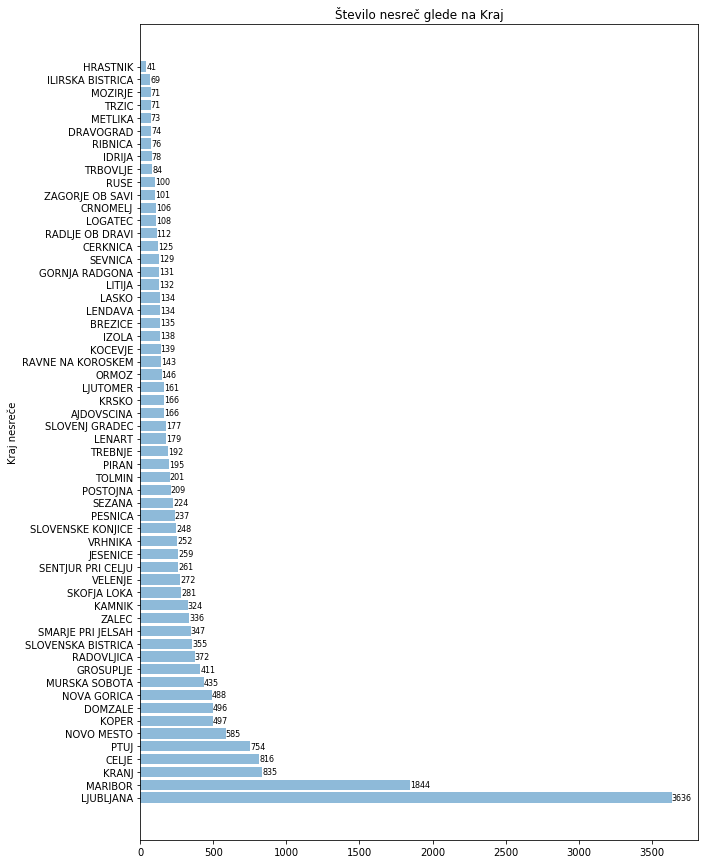

In [5]:
regije = {k: v for k, v in sorted(regije.items(), reverse=True, key=lambda item: item[1])}

kraji = []
stNesrec = []

for regija, value in regije.items():
    if regija not in kraji:
            kraji.append(regija)
    
    stNesrec.append(value)

y_pos = np.arange(len(kraji))

plt.figure(figsize=(10,15))
plt.barh(y_pos, stNesrec, align='center', alpha=0.5)
plt.yticks(y_pos, kraji)
plt.ylabel('Kraj nesreče')
plt.title('Število nesreč glede na Kraj')
for i, v in enumerate(stNesrec):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

 2. Št. nesreč glede na čas (uro)

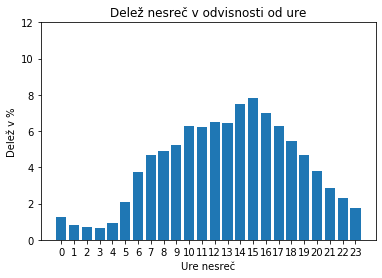

In [6]:
vse_nesrece = 0

for _, stevilo_nesrece in ureNesrec.items():
    vse_nesrece += stevilo_nesrece
    

nesrece = [(value / vse_nesrece) * 100.0 for _, value in ureNesrec.items()]
ure = [ura for ura, _ in ureNesrec.items()]

#plt.figure(figsize=(8,6))
plt.bar(ure, nesrece)
plt.title('Delež nesreč v odvisnosti od ure')
plt.ylabel('Delež v %')
plt.xlabel('Ure nesreč')
plt.xticks(np.arange(24))
plt.ylim(0, 12)
plt.show()

In [7]:
pearsonovaKorelacija = np.mean(((ure - np.mean(ure))*(nesrece-np.mean(nesrece)))/(np.std(ure)*np.std(nesrece)))
print("Pearsonova korelacija:", pearsonovaKorelacija)

Pearsonova korelacija: 0.4097438054405891


3. Nesreče glede na tip vozila

In [8]:
tipiPrevoznihStredstev = dict()
smrtGledeNaVozilo = dict()

seznamNeVozil = ["pesec", "potnik"]

for _, udelezenci in udelezenciNesrec.items():
    for vozilo, poskodbe in udelezenci:
        if vozilo not in seznamNeVozil:
            if vozilo not in tipiPrevoznihStredstev:
                tipiPrevoznihStredstev[vozilo] = 1
            else:
                tipiPrevoznihStredstev[vozilo] += 1
                
            if poskodbe == "smrtni izid":
                if vozilo not in smrtGledeNaVozilo:
                    smrtGledeNaVozilo[vozilo] = 1
                else:
                    smrtGledeNaVozilo[vozilo] += 1



{'osebni avtomobil': 23957, 'tovorno vozilo': 2873, 'ostalo': 1804, 'kolesar': 1365, 'enosledno vozilo': 1087, 'avtobus': 340, 'traktor': 149, 'specialno vozilo': 38, 'delovni stroj': 30}


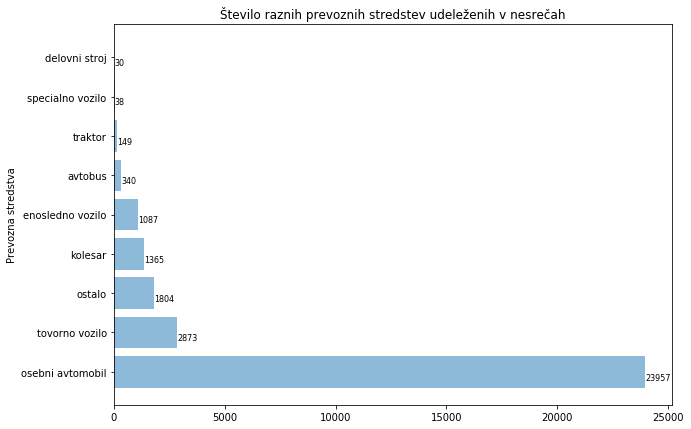

In [9]:
#Število posameznik prevoznih stredstev v nesrečah
            
tipiPrevoznihStredstev = {k: v for k, v in sorted(tipiPrevoznihStredstev.items(), reverse=True, key=lambda item: item[1])}

print(tipiPrevoznihStredstev)

stredstvo = []
stVkljucenih = []

for vozilo, value in tipiPrevoznihStredstev.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število raznih prevoznih stredstev udeleženih v nesrečah')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

{'osebni avtomobil': 88, 'enosledno vozilo': 28, 'tovorno vozilo': 19, 'kolesar': 9, 'avtobus': 4, 'traktor': 2, 'ostalo': 1}


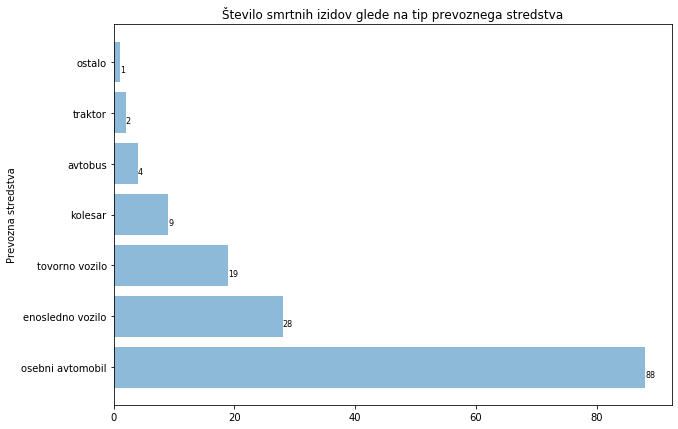

In [10]:
#Število smrtnih izidov glede na tip prevoznega stredstva

smrtGledeNaVozilo = {k: v for k, v in sorted(smrtGledeNaVozilo.items(), reverse=True, key=lambda item: item[1])}

print(smrtGledeNaVozilo)

stredstvo = []
stVkljucenih = []

for vozilo, value in smrtGledeNaVozilo.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število smrtnih izidov glede na tip prevoznega stredstva')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

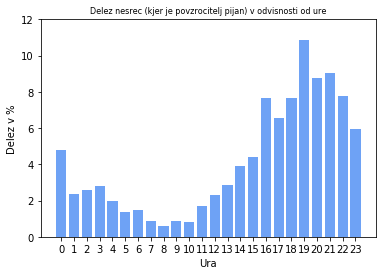

In [11]:
vsi = 0
pijani = 0
ure_nesrec = dict()
for row in data:
    ura = int(row["UraPN"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            pijani += 1
            if ura not in ure_nesrec.keys():
                ure_nesrec[ura] = 0
            ure_nesrec[ura] += 1
            vsi += 1;
        

s = sorted(ure_nesrec.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ure_nesrec.get(i) / vsi) * 100.0

#plt.figure(dpi = 120)
plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (kjer je povzrocitelj pijan) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 12)
plt.ylabel("Delez v %");